In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import os
import re
import string
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.util import bigrams, trigrams
from nltk import ngrams
from collections import Counter
from wordcloud import WordCloud

In [3]:
!pip install emoji
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 34.6 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=d1f42fb3d55effe73d718c5b9849c69a8ac36a1bf93ae03e7fc56d27b9d30ac4
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [5]:
from google.colab import drive
drive.mount('/content/drive/')

MessageError: ignored

In [4]:
os.chdir("drive/MyDrive/TextAnalytics - AMI 2020/dataset/")

In [ ]:
ami_csv = "AMI2020_training_raw_anon.tsv"

df = pd.read_csv(ami_csv, sep='\t')

In [ ]:
with open('vocab_albertO.txt') as f:
    dictionary_albert = [line.rstrip('\n') for line in f]

In [ ]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 8.9 MB/s 


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()  # loads default word frequency list
spell.word_frequency.load_words(dictionary_albert)

In [ ]:
s = 'bellisssizma' 
if s not in dictionary_albert:
   print(spell.correction(s))

bellissima


In [ ]:
pd.set_option("display.max_colwidth", None)
df = df.drop(columns="id")

In [ ]:
def target_label (row):
  if ((row["aggressiveness"] == 1) & (row["misogynous"] == 1)):
    return 2
  if ((row["aggressiveness"] == 0) & (row["misogynous"] == 1)):
    return 1
  else:
    return 0

df['target'] = df.apply(lambda row: target_label(row), axis=1)

## 1 - Clean Tweets

In [ ]:
abbreviazioni = {
    "x" : "per",
    "xkè" : "perchè",
    "xk" : "perchè",
    "pe" : "per",
    "fatte" : "farti",
    "protegge" : "proteggere",
    "co" : "con",
    "pm" : "pomeriggio",
    "fotoskiop" : "photoshop",
    "nn": "non",
    "er" : "il",
    "son" : "sono",
    "mo" : "adesso",
    "anke" : "anche",
    "gran" : "grande",
    "komunque" : "comunque",
    "cmq" : "comunque",
    "xchè" : "perchè",
    "ig": "instagram",
    "ke" : "che",
    "kè" : "che",
    "dm" : "messaggio",
    "qulc":"qualcosa",
    "tt": "tutto"
}

In [ ]:
# remove consecutive duplicate words, such as duplicate mention (e.g. <mention> <mention>)
def remove_adjacent_dup_words(text):
    old_text = text.split()
    new_text = []
    last_word = None
    for crn_word in old_text:
        if crn_word != last_word:
            new_text.append(crn_word)
            last_word = crn_word
    to_string = ' '.join(new_text)
    return to_string

# remove consecutive same vowels (e.g. bellissimaaa ---> bellissima)
def remove_consecutive_same_vowels(text):
  old_text = text.split()
  new_text = []
  for crn_word in old_text:
    new_word = re.compile('aa+').sub('a',crn_word)
    new_word = re.compile('ee+').sub('e',new_word)
    new_word = re.compile('ii+').sub('i',new_word)
    new_word = re.compile('oo+').sub('o',new_word)
    new_word = re.compile('uu+').sub('u',new_word)
    new_text.append(new_word)
  to_string = ' '.join(new_text)
  return to_string

def normalize_doppie(text):
  old_text = text.split()
  new_text = []
  for crn_word in old_text:
    new_word = re.compile('mm+').sub('mm',crn_word)
    new_word = re.compile('bb+').sub('bb',new_word)
    new_word = re.compile('cc+').sub('cc',new_word)
    new_word = re.compile('dd+').sub('dd',new_word)
    new_word = re.compile('ff+').sub('ff',new_word)
    new_word = re.compile('gg+').sub('gg',new_word)
    new_word = re.compile('hh+').sub('hh',new_word)
    new_word = re.compile('ll+').sub('ll',new_word)
    new_word = re.compile('nn+').sub('nn',new_word)
    new_word = re.compile('pp+').sub('pp',new_word)
    new_word = re.compile('qq+').sub('qq',new_word)
    new_word = re.compile('rr+').sub('rr',new_word)
    new_word = re.compile('ss+').sub('ss',new_word)
    new_word = re.compile('tt+').sub('tt',new_word)
    new_word = re.compile('vv+').sub('vv',new_word)
    new_word = re.compile('zz+').sub('zz',new_word)
    new_word = re.compile('xx+').sub('x',new_word)
    new_word = re.compile('si+').sub('si',new_word)
    new_text.append(new_word)
  to_string = ' '.join(new_text)
  return to_string

# remove re-tweet (RT), as they add little information
def remove_rt(text):
  old_text = text.split()
  if 'rt' in old_text:
    old_text.remove('rt')
  to_string = ' '.join(old_text)
  return to_string

# remove some common abbrv words
def remove_abbreviazioni(text):
    old_text = text.split()
    new_text = []
    for crn_word in old_text:
        if crn_word in abbreviazioni.keys():
            new_text.append(abbreviazioni[crn_word])
        else:
            new_text.append(crn_word)
    to_string = ' '.join(new_text)
    return to_string

In [ ]:
# example
new_s = normalize_doppie('bellisssima')
print(new_s)

bellissima


In [ ]:
from dataclasses import replace
def cleaning_text(text):
  # replace ? and ! at the end of the text, often used to put emphasis
  new_text= re.sub("[!\?]+$", " <puntuaction> ", text)
  # replace all other puntuaction in the text with with white space
  #new_text = re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^`{|}~-]+', ' ', text) 
  new_text = new_text.translate ({ord(c): " " for c in '[]“!"$%&\'‘(«)ø¡—»*”’×+►,°.•/:;=#@?[\→\^–`{|}~-]+¿…'})
  new_text = new_text.replace("€", " soldi")
  new_text = new_text.replace("lt", "")
  # replace # in hashtag with white space, keep the name as it can be significant
  new_text = new_text.replace("#", ' ')
  # replace links
  new_text = re.sub(r'(https|http)?:\/\/(\w|\.|\-|\/|\=|\&|\%)*\b', ' ',new_text)
  new_text = re.sub(r'(www)(\w|\.|\-|\/|•|\=|\&|\%|\xa0|gt|”)*\b', ' ', new_text)
  # replace unicode emoji with white space
  new_text = emoji.replace_emoji(new_text,replace=' <emoji> ')
  # replace emoticons  
  new_text = re.sub(":+[';¿()-|xddd|/|lt||DPXp]\S*|;+['()-/|DPXp]\S*", ' <emoji> ', new_text)
  # replace numbers in mention with white space
  new_text = re.sub("_[0-9]+", '', new_text)
  # replace other numbers in text with <number>
  new_text = re.sub("[0-9]+", " <number> ", new_text)
  # replace double spaces
  new_text = re.sub('\s{2,}', ' ', new_text)
  new_text = re.sub(r'(https|http)?:\/\/(\w|\.|\-|\/|_|—|\=|\&|\%)*\b', ' ',new_text)
  # replace user tag with mention, like the others in the texts
  new_text = re.sub("@\S+", " <mention> ", new_text)
  new_text = re.sub("_", ' ', new_text)

  return new_text

In [ ]:
# lower case the tweets
df["text"] = df["text"].map(lambda x: x.lower())

In [ ]:
# clean text from puntuaction, emojis etc..
df['text_cleaned'] = df.apply(lambda row: cleaning_text(row["text"]), axis=1)

In [ ]:
# remove RT (re-tweet)
df['text_cleaned'] = df.apply(lambda row: remove_rt(row['text_cleaned']), axis=1)

In [ ]:
# remove_adjacent_dup_words
df['text_cleaned'] = df.apply(lambda row: remove_adjacent_dup_words(row['text_cleaned']), axis=1)

In [ ]:
# remove consecutive same vowels
df["text_cleaned"] = df.apply(lambda row: remove_consecutive_same_vowels(row["text_cleaned"]), axis=1)

In [ ]:
df['text_cleaned'] = df.apply(lambda row: remove_abbreviazioni(row['text_cleaned']), axis=1)

In [ ]:
df['text_cleaned'] = df.apply(lambda row: normalize_doppie(row['text_cleaned']), axis=1)

In [ ]:
def remove_tag(text):
  old_text = text.split()
  new_text = []
  for crn_word in old_text:
    if crn_word not in ['<mention>','<number>','<url>','<puntuaction>', '<emoji>']:
      new_text.append(crn_word)
  to_string = ' '.join(new_text)
  return to_string

In [ ]:
df['text_cleaned_without_tag'] = df.apply(lambda row: remove_tag(row['text_cleaned']), axis=1)

In [ ]:
df.head(3)

,text,misogynous,aggressiveness,target,text_cleaned,text_cleaned_without_tag
0,<mention_1> <mention_2> fatti trovare te lo do volentieri e ti sborro in bocca,1,1,2,<mention> fatti trovare te lo do volentieri e ti sborro in bocca,fatti trovare te lo do volentieri e ti sborro in bocca
1,<mention_1> tu dovresti ricominciare dai semafori a fare la lavavetri..ma tranquilla tanto il vitalizio ti resterà in gola,1,1,2,<mention> tu dovresti ricominciare dai semafori a fare la lavavetri ma tranquilla tanto il vitalizio ti resterà in gola,tu dovresti ricominciare dai semafori a fare la lavavetri ma tranquilla tanto il vitalizio ti resterà in gola
2,"amore,sei presentabile? xchè così via skype ti faccio conoscere i miei parenti..."" e fu così che da un tablet ho conosciuto i parenti terroni della mia tettona,prendendomi un ""avete già finito di pranzare? beh si,voi al nord siete diversi..."" dal nord è tutto,a voi...""",1,1,2,amore sei presentabile perchè così via skype ti faccio conoscere i miei parenti e fu così che da un tablet ho conosciuto i parenti terroni della mia tettona prendendomi un avete già finito di pranzare beh si voi al nord siete diversi dal nord è tutto a voi,amore sei presentabile perchè così via skype ti faccio conoscere i miei parenti e fu così che da un tablet ho conosciuto i parenti terroni della mia tettona prendendomi un avete già finito di pranzare beh si voi al nord siete diversi dal nord è tutto a voi


In [ ]:
text_naggr = df["text_cleaned"].loc[df['target']=="Non Aggressive Misogynous"].tolist()
text_aggr = df["text_cleaned"].loc[df['target']=="Aggressive Misogynous"].tolist()
text_nm = df["text_cleaned"].loc[df['target']=="Non Misogynous"].tolist()
text_cleaned = df["text_cleaned"]
text_cleaned_wo_tag = df["text_cleaned_without_tag"]

In [ ]:
def misspelled_words(col):
  misspelled_list = []
  misspelled_set = set()
  for tweet in col:
    old_text = tweet.split()
    misspelled = list(spell.unknown(old_text))
    if len(misspelled)>=1:
      for i in misspelled:
        misspelled_set.add(i)
        misspelled_list.append(i)
  return misspelled_set, misspelled_list 

In [ ]:
def tot_vocab(col):
  tot_list = []
  tot_set = set()
  for tweet in col:
    text = tweet.split()
    for i in text:
      tot_set.add(i)
      tot_list.append(i)
  return tot_set,tot_list

In [ ]:
def get_misspelled_stats(col):
  misspelled_set, misspelled_list = misspelled_words(col)
  tot_set, tot_list = tot_vocab(col)
  misspelled_set_len = len(misspelled_set)
  tot_set_len = len(tot_set)
  print("Percentage of words out of vocabulary " + str(round(misspelled_set_len/tot_set_len*100,2)) )

  misspelled_list_len = len(misspelled_list)
  tot_list_len = len(tot_list)
  print("Percentage freq of words out of vocabulary " + str(round(misspelled_list_len/tot_list_len*100,2)) )
  return misspelled_set

In [ ]:
misspelled_set = get_misspelled_stats(text_cleaned_wo_tag)

Percentage of words out of vocabulary 17.2
Percentage freq of words out of vocabulary 3.05


In [ ]:
miss_corr

{'fantasstica': 'fantastica',
 'tartasserò': 'tartasser',
 'radiata': 'radiate',
 'macròn': 'macron',
 'reaà': 'real',
 'calcistitico': 'calcistico',
 'feticiste': 'feticista',
 'padellari': 'padellaro',
 'gitamadrid': None,
 'tubare': 'rubare',
 'jlola': 'lola',
 'hulo': 'hull',
 'kuesta': 'questa',
 'porona': 'corona',
 'arettanto': 'altrettanto',
 'juvenapoli': None,
 'zhangjing': 'hanging',
 'primoappuntamento': None,
 'benetra': 'penetra',
 'aprivo': 'aprilo',
 'inestistenti': 'inesistenti',
 'stroncava': 'stroncata',
 'intrieri': 'interi',
 'playoffscudettounipolsai': None,
 'voastomaco': 'voltastomaco',
 'reputano': 'deputato',
 'thewalkingdead': None,
 'vistovado': None,
 'pfiglio': 'figlio',
 'occorresse': 'accorgesse',
 'cianone': 'canone',
 'screnshottato': None,
 'zvdjdiebdjidhhdbghdfh': None,
 'dimaggino': 'dimagrito',
 'alberofilia': None,
 'quantitativo': 'quantitative',
 'ruidiaz': 'ridia',
 'simboleggiati': 'simboleggia',
 'discorsoin': 'discorsoni',
 'ghali': 'gali',


In [ ]:
df.head()

,text,misogynous,aggressiveness,target,text_cleaned,text_cleaned_without_tag
0,<mention_1> <mention_2> fatti trovare te lo do volentieri e ti sborro in bocca,1,1,2,<mention> fatti trovare te lo do volentieri e ti sborro in bocca,fatti trovare te lo do volentieri e ti sborro in bocca
1,<mention_1> tu dovresti ricominciare dai semafori a fare la lavavetri..ma tranquilla tanto il vitalizio ti resterà in gola,1,1,2,<mention> tu dovresti ricominciare dai semafori a fare la lavavetri ma tranquilla tanto il vitalizio ti resterà in gola,tu dovresti ricominciare dai semafori a fare la lavavetri ma tranquilla tanto il vitalizio ti resterà in gola
2,"amore,sei presentabile? xchè così via skype ti faccio conoscere i miei parenti..."" e fu così che da un tablet ho conosciuto i parenti terroni della mia tettona,prendendomi un ""avete già finito di pranzare? beh si,voi al nord siete diversi..."" dal nord è tutto,a voi...""",1,1,2,amore sei presentabile perchè così via skype ti faccio conoscere i miei parenti e fu così che da un tablet ho conosciuto i parenti terroni della mia tettona prendendomi un avete già finito di pranzare beh si voi al nord siete diversi dal nord è tutto a voi,amore sei presentabile perchè così via skype ti faccio conoscere i miei parenti e fu così che da un tablet ho conosciuto i parenti terroni della mia tettona prendendomi un avete già finito di pranzare beh si voi al nord siete diversi dal nord è tutto a voi
3,"<mention_1> salvo poi mandare la culona a mosca, aummaumm, per farsi dare da putin commesse multimiliardarie e metterlo in quel posto ai fratelli della ue (tra i quali noi)",1,0,1,<mention> salvo poi mandare la culona a mosca aummaumm per farsi dare da putin commesse muimiliardarie e metterlo in quel posto ai fratelli della ue tra i quali noi,salvo poi mandare la culona a mosca aummaumm per farsi dare da putin commesse muimiliardarie e metterlo in quel posto ai fratelli della ue tra i quali noi
4,"<mention_1> <mention_2> vediamo gentiloni, è ora di finirla di essere servili! pensiamo al danno che la francia ci ha fatto con sarkosy e la culona della merkel con il bombardamento della libia",1,1,2,<mention> vediamo gentiloni è ora di finirla di essere servili pensiamo al danno che la francia ci ha fatto con sarkosy e la culona della merkel con il bombardamento della libia,vediamo gentiloni è ora di finirla di essere servili pensiamo al danno che la francia ci ha fatto con sarkosy e la culona della merkel con il bombardamento della libia


##2 - Tokenization and stopwords

In [ ]:
# tokenization of tweets 
token_list = []
for tweet in df["text_cleaned"]:
    token_list.append(tweet.split())

In [ ]:
token_list

[['<mention>',
  'fatti',
  'trovare',
  'te',
  'lo',
  'do',
  'volentieri',
  'e',
  'ti',
  'sborro',
  'in',
  'bocca'],
 ['<mention>',
  'tu',
  'dovresti',
  'ricominciare',
  'dai',
  'semafori',
  'a',
  'fare',
  'la',
  'lavavetri',
  'ma',
  'tranquilla',
  'tanto',
  'il',
  'vitalizio',
  'ti',
  'resterà',
  'in',
  'gola'],
 ['amore',
  'sei',
  'presentabile',
  'perchè',
  'così',
  'via',
  'skype',
  'ti',
  'faccio',
  'conoscere',
  'i',
  'miei',
  'parenti',
  'e',
  'fu',
  'così',
  'che',
  'da',
  'un',
  'tablet',
  'ho',
  'conosciuto',
  'i',
  'parenti',
  'terroni',
  'della',
  'mia',
  'tettona',
  'prendendomi',
  'un',
  'avete',
  'già',
  'finito',
  'di',
  'pranzare',
  'beh',
  'si',
  'voi',
  'al',
  'nord',
  'siete',
  'diversi',
  'dal',
  'nord',
  'è',
  'tutto',
  'a',
  'voi'],
 ['<mention>',
  'salvo',
  'poi',
  'mandare',
  'la',
  'culona',
  'a',
  'mosca',
  'aummaumm',
  'per',
  'farsi',
  'dare',
  'da',
  'putin',
  'commesse

In [56]:
# spaCy for italian Pos and lemmatization 
!pip3 install -U spacy
!python3 -m spacy download it_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-09-07 10:47:57.952768: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 567.9 MB 8.2 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_lg')


In [57]:
# PoS 
import spacy
from spacy.lang.it.examples import sentences 
nlp = spacy.load("it_core_news_lg")

### Bigram with Lemmatization, in text cleaned without tag 

In [58]:
def spacy_nlp_tokenizer(text):
  doc = nlp(text)
  lemmas = []
  for token in doc:
    if (token.pos_== "VERB"): 
      lemmas.append(token.lemma_)
    elif (token.text in ['mention','number','url','puntuaction','emoji']):
      lemmas.append("<"+token.text+">")
    # remove stopwords and words whose len is not at least 2
    elif (not token.is_stop):
      lemmas.append(token.text)
    else: 
      lemmas.append('')

  lemmas = [token for token in lemmas if token!='']
  lemmas = [token for token in lemmas if len(token) >1]

  all_tokens = list()
  all_tokens.extend(lemmas)
  all_tokens = ' '.join(all_tokens)

  return all_tokens

In [ ]:
# we create another column with lemmas (just for verbs, bc other part of the speech were not well lemmatized)

df['final_text_wo_tag'] = df.apply(lambda row: spacy_nlp_tokenizer(row['text_cleaned_without_tag']), axis=1)

In [ ]:
# we create another column with lemmas (just for verbs, bc other part of the speech were not well lemmatized)
# and also include tags to have a final rappresentative tweets of the original ones 

df['final_text_tag'] = df.apply(lambda row: spacy_nlp_tokenizer(row['text_cleaned']), axis=1)

In [ ]:
text_cleaned_wo_tag = df["final_text_wo_tag"]

misspelled_set = get_misspelled_stats(text_cleaned_wo_tag)

Percentage of words out of vocabulary 23.43
Percentage freq of words out of vocabulary 8.03


In [ ]:
def sub_misspelled(text,d):
  lemmas = []
  for token in text.split():
    if token in d:
      if d[token] is not None:
        lemmas.append(d[token])
    else:
      lemmas.append(token)

  all_tokens = list()
  all_tokens.extend(lemmas)
  all_tokens = ' '.join(all_tokens)
  return all_tokens

In [ ]:
miss_corr = {}
for word in misspelled_set:
  miss_corr[word] = spell.correction(word)

In [ ]:
df["final_text_wo_tag"] = df.apply(lambda row: sub_misspelled(row['final_text_wo_tag'],miss_corr), axis=1)

In [ ]:
df["final_text_tag"] = df.apply(lambda row: sub_misspelled(row['final_text_tag'],miss_corr), axis=1)

In [ ]:
text_cleaned_wo_tag = df["final_text_wo_tag"]

misspelled_set = get_misspelled_stats(text_cleaned_wo_tag)

Percentage of words out of vocabulary 7.69
Percentage freq of words out of vocabulary 3.0


In [ ]:
# delete 11 tweets which contained just value "<mention>"
df = df[df["final_text_tag"]!="<mention>"]

In [ ]:
df = df[df['final_text_wo_tag'].apply(lambda x: not isinstance(x, float))]

In [ ]:
df = df.drop(columns=["text_cleaned_without_tag","text_cleaned"])

In [ ]:
df.to_csv("training_set_cleaned.csv",index=False)

## Analysis Post PreProcessing - Most Frequent Words and Bigrams/Trigrams

In [ ]:
df.head(3)

,text,misogynous,aggressiveness,target,final_text_wo_tag,final_text_tag
0,<mention_1> <mention_2> fatti trovare te lo do volentieri e ti sborro in bocca,1,1,2,fare trovare do volentieri sborrare bocca,<mention> fare trovare do volentieri sborrare bocca
1,<mention_1> tu dovresti ricominciare dai semafori a fare la lavavetri..ma tranquilla tanto il vitalizio ti resterà in gola,1,1,2,dovresti ricominciare semafori fare lavavetri tranquillo vitalizio restare gola,<mention> dovresti ricominciare semafori fare lavavetri tranquillo vitalizio restare gola
2,"amore,sei presentabile? xchè così via skype ti faccio conoscere i miei parenti..."" e fu così che da un tablet ho conosciuto i parenti terroni della mia tettona,prendendomi un ""avete già finito di pranzare? beh si,voi al nord siete diversi..."" dal nord è tutto,a voi...""",1,1,2,amore presentabile perchè skype fare conoscere parenti tablet conoscere parenti terroni tettona prendere mi finire pranzare beh nord diversi nord,amore presentabile perchè skype fare conoscere parenti tablet conoscere parenti terroni tettona prendere mi finire pranzare beh nord diversi nord


In [52]:
def counter_trigram(text, lemma_trigrams):
  doc = nlp(text)

  lemmas = [token.lemma_ if (token.pos_== "VERB") else token.text if (not token.is_stop) else '' for token in doc]
  lemmas = [token for token in lemmas if token!='']
  lemmas = [token for token in lemmas if len(token) >1]
  for p1, p2, p3 in trigrams(lemmas):
    lemma_trigrams.append(p1 + "-" + p2 + "-" + p3)

  return lemma_trigrams

In [53]:
def counter_bigram(text, lemma_bigrams):
  doc = nlp(text)

  lemmas = [token.lemma_ if (token.pos_== "VERB") else token.text if (not token.is_stop) else '' for token in doc]
  lemmas = [token for token in lemmas if token!='']
  lemmas = [token for token in lemmas if len(token) >1]
  for p1, p2 in nltk.bigrams(lemmas):
    lemma_bigrams.append(p1 + "-" + p2 )

  return lemma_bigrams

In [59]:
# get most commont bigram in tweets which are lemmatized, cleaned and without any tag (<mention>, <url> etc...)
lemma_bigrams_0 = []
for index, row in df[df['target']==0].iterrows():
   counter_bigram(row['final_text_wo_tag'],lemma_bigrams_0)

lemma_bigrams_1 = []
for index, row in df[df['target']==1].iterrows():
   counter_bigram(row['final_text_wo_tag'],lemma_bigrams_1)

lemma_bigrams_2 = []
for index, row in df[df['target']==2].iterrows():
   counter_bigram(row['final_text_wo_tag'],lemma_bigrams_2)

In [60]:
top3_bigrams_0 = Counter(lemma_bigrams_0).most_common(3)
top3_bigrams_1 = Counter(lemma_bigrams_1).most_common(3)
top3_bigrams_2 = Counter(lemma_bigrams_2).most_common(3)

print("Top 3 bigrams for non mys tweets:", top3_bigrams_0)
print("Top 3 bigrams for mys tweets:", top3_bigrams_1)
print("Top 3 bigrams for agr mys tweets:", top3_bigrams_2)

Top 3 bigrams for non mys tweets: [('porca-puttana', 1590), ('porca-troia', 143), ('asia-argento', 72)]
Top 3 bigrams for mys tweets: [('bel-culo', 72), ('pezzo-figa', 33), ('bella-tettona', 29)]
Top 3 bigrams for agr mys tweets: [('bel-culo', 73), ('figa-legno', 55), ('bel-culone', 42)]


In [ ]:
top3_bigrams_0[0][0]

'porca-puttana'

In [61]:
top3_bigrams0 = [top3_bigrams_0[0][0],top3_bigrams_0[1][0],top3_bigrams_0[2][0]]
top3_bigrams1 = [top3_bigrams_1[0][0],top3_bigrams_1[1][0],top3_bigrams_1[2][0]]
top3_bigrams2 = [top3_bigrams_2[0][0],top3_bigrams_2[1][0],top3_bigrams_2[2][0]]

In [62]:
lemma_bigrams_new = []
for i in lemma_bigrams_0:
  if (i in top3_bigrams0):
    l = [i,0]
    lemma_bigrams_new.append(l)

for i in lemma_bigrams_1:
  if (i in top3_bigrams1):
    l = [i,1]
    lemma_bigrams_new.append(l)

for i in lemma_bigrams_2:
  if (i in top3_bigrams2):
    l = [i,2]
    lemma_bigrams_new.append(l)

In [ ]:
bigram_df = pd.DataFrame(lemma_bigrams_new, columns=['Bigram', 'Class'])

In [ ]:
bigram_df

,Bigram,Class
0,porca-troia,0
1,porca-puttana,0
2,asia-argento,0
3,porca-puttana,0
4,porca-puttana,0
...,...,...
2104,bel-culo,2
2105,bel-culo,2
2106,bel-culo,2
2107,bel-culo,2


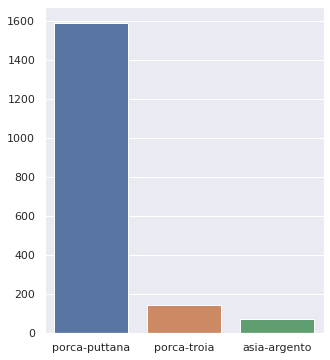

In [66]:
plt.figure(figsize=(5, 6))
sns.set_style("darkgrid")
counter_keys = [key[0] for key in top3_bigrams_0]
counter_value = [value[1] for value in top3_bigrams_0]
sns.barplot(x=counter_keys,y=counter_value)
plt.show()

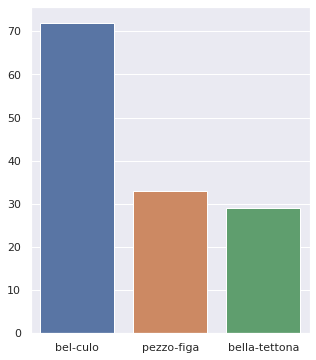

In [67]:
plt.figure(figsize=(5, 6))
sns.set_style("darkgrid")
counter_keys = [key[0] for key in top3_bigrams_1]
counter_value = [value[1] for value in top3_bigrams_1]
sns.barplot(x=counter_keys,y=counter_value)
plt.show()

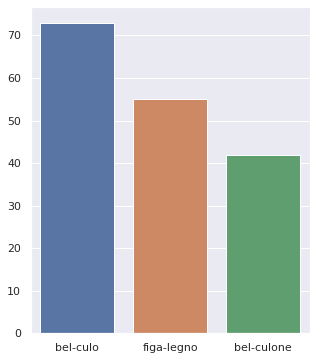

In [68]:
plt.figure(figsize=(5, 6))
sns.set_style("darkgrid")
counter_keys = [key[0] for key in top3_bigrams_2]
counter_value = [value[1] for value in top3_bigrams_2]
sns.barplot(x=counter_keys,y=counter_value)
plt.show()

In [ ]:
# get most commont trigram in tweets which are lemmatized, cleaned and without any tag (<mention>, <url> etc...)

lemma_trigrams_all = []
for row in text_cleaned_wo_tag:
   counter_trigram(row,lemma_trigrams_all)

In [ ]:
Counter(lemma_trigrams_all).most_common(10)

[('porca-puttana-fare', 43),
 ('porca-puttana-cazzo', 38),
 ('avere-bel-culo', 37),
 ('porca-puttana-stare', 25),
 ('porca-puttana-troia', 23),
 ('porca-troia-cazzo', 21),
 ('raga-porca-puttana', 21),
 ('cazzo-porca-puttana', 20),
 ('porca-puttana-avere', 19),
 ('porca-puttana-porca', 17)]

In [6]:
ami_csv = "training_set_cleaned.csv"
df = pd.read_csv(ami_csv)

In [7]:
df.head()

,text,misogynous,aggressiveness,target,final_text_wo_tag,final_text_tag
0,<mention_1> <mention_2> fatti trovare te lo d...,1,1,2,fare trovare do volentieri sborrare bocca,<mention> fare trovare do volentieri sborrare ...
1,<mention_1> tu dovresti ricominciare dai semaf...,1,1,2,dovresti ricominciare semafori fare lavavetri ...,<mention> dovresti ricominciare semafori fare ...
2,"amore,sei presentabile? xchè così via skype ti...",1,1,2,amore presentabile perchè skype fare conoscere...,amore presentabile perchè skype fare conoscere...
3,<mention_1> salvo poi mandare la culona a mosc...,1,0,1,mandare culona mosca fare si dare putin commet...,<mention> mandare culona mosca fare si dare pu...
4,"<mention_1> <mention_2> vediamo gentiloni, è o...",1,1,2,vedere gentiloni finire lo servili pensare dan...,<mention> vedere gentiloni finire lo servili p...


In [8]:
vocabulary_set = set()
for tweet in df['final_text_wo_tag']:
  for token in tweet.split():
    vocabulary_set.add(token)
    
vocabulary_len = len(vocabulary_set)

print("Unique words ", vocabulary_len)

Unique words  9482


In [ ]:
misspelled_set = misspelled_words(text_cleaned_wo_tag)
misspelled_set_len = len(misspelled_set)
tot_set_len = len(tot_set)
print("Percentage of words out of vocabulary " + str(round(misspelled_set_len/tot_set_len*100,2)) )

misspelled_list_len = len(misspelled_list)
tot_list_len = len(tot_list)
print("Percentage freq of words out of vocabulary " + str(round(misspelled_list_len/tot_list_len*100,2)) )

In [48]:
def plot_words_cloud(df):        
    all_words = ' '.join(df["final_text_wo_tag"])
    wordcloud = WordCloud(background_color='white', width=2500, height=1500).generate(all_words)
    plt.figure(1,figsize=(7, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

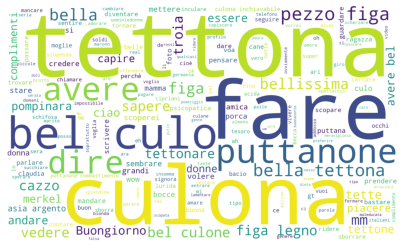

In [49]:
# word clouds for mys tweets
plot_words_cloud(df[df['target']==1])

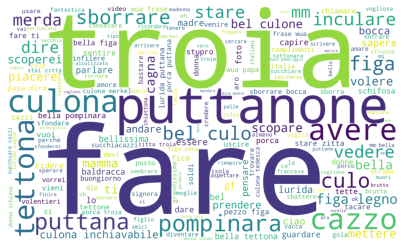

In [50]:
# word clouds for aggressive tweets
plot_words_cloud(df[df['target']==2])

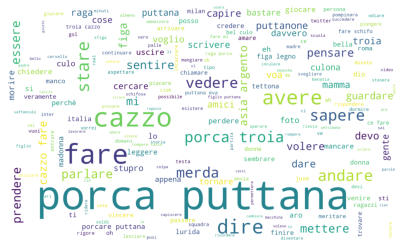

In [51]:
# word cloud not mysog.
plot_words_cloud(df[df['target']==0])

In [ ]:
all_words = []
for tweet in df["final_text_wo_tag"]:
  for token in tweet.split():
    all_words.append(token)

counter = Counter(all_words)

In [ ]:
!pip install statscounter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for statscounter: filename=statscounter-0.0.10-py3-none-any.whl size=6766 sha256=1eb1020af543c7769601539d5a9427677fde20f859c13bda400074d7c8e65669
  Stored in directory: /root/.cache/pip/wheels/c8/2f/96/90c418c6d5d778cabefe544957bc7cfaf143ff89303a5f4951
Successfully built statscounter


In [ ]:
import statscounter as stats

letter_freq = stats.StatsCounter(counter)

print(letter_freq.max())

print(letter_freq.argmax())

print(letter_freq.mean())

1940
puttana
4.143108160874658


In [ ]:
def plot_freq_words(df):
  all_words = []
  for tweet in df["final_text_wo_tag"]:
    for token in tweet.split():
      all_words.append(token)

  counter = Counter(all_words).most_common(15)
  plt.figure(figsize=(8, 7))
  sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
  counter_keys = [key[0] for key in counter]
  counter_value = [value[1] for value in counter]
  sns.barplot(x=counter_value,y=counter_keys, palette= sns.color_palette("tab10"))
  plt.show()

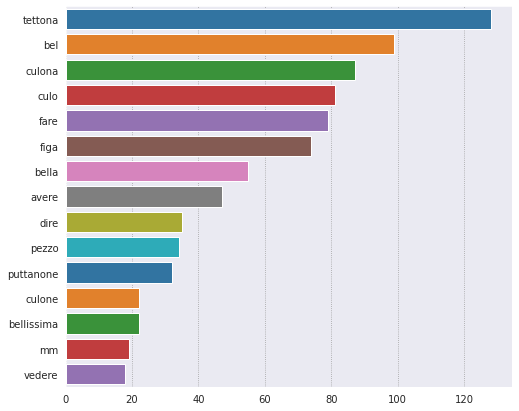

In [ ]:
plot_freq_words(df[df['target']==1])

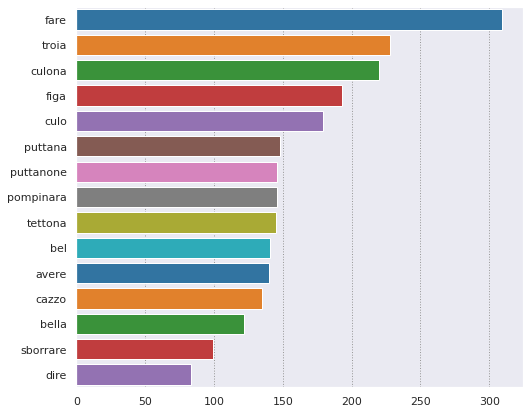

In [ ]:
plot_freq_words(df[df['target']==2])

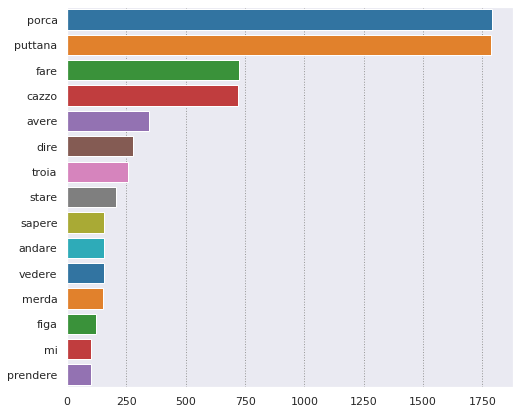

In [ ]:
plot_freq_words(df[df['target']==0])

In [ ]:
misspelled_list = []
for tweet in text_cleaned_wo_tag:
  old_text = tweet.split()
  #old_text = [t for t in old_text if t not in ['<mention>','<number>','<url>','<puntuaction>']]
  misspelled = list(spell.unknown(old_text))
  if len(misspelled)>=1:
    for i in misspelled:
      misspelled_list.append(i)

NameError: ignored

In [13]:
df['Chars_Tweets'] = df['final_text_tag'].apply(lambda x: len(x))
df['Words_Tweets'] = df['final_text_tag'].apply(lambda x: len(x.split()))

In [ ]:
df.head()

,text,misogynous,aggressiveness,target,final_text_wo_tag,final_text_tag,char_len,word_len
0,<mention_1> <mention_2> fatti trovare te lo do volentieri e ti sborro in bocca,1,1,2,fare trovare do volentieri sborrare bocca,<mention> fare trovare do volentieri sborrare bocca,51,7
1,<mention_1> tu dovresti ricominciare dai semafori a fare la lavavetri..ma tranquilla tanto il vitalizio ti resterà in gola,1,1,2,dovresti ricominciare semafori fare lavavetri tranquillo vitalizio restare gola,<mention> dovresti ricominciare semafori fare lavavetri tranquillo vitalizio restare gola,89,10
2,"amore,sei presentabile? xchè così via skype ti faccio conoscere i miei parenti..."" e fu così che da un tablet ho conosciuto i parenti terroni della mia tettona,prendendomi un ""avete già finito di pranzare? beh si,voi al nord siete diversi..."" dal nord è tutto,a voi...""",1,1,2,amore presentabile perchè skype fare conoscere parenti tablet conoscere parenti terroni tettona prendere mi finire pranzare beh nord diversi nord,amore presentabile perchè skype fare conoscere parenti tablet conoscere parenti terroni tettona prendere mi finire pranzare beh nord diversi nord,145,20
3,"<mention_1> salvo poi mandare la culona a mosca, aummaumm, per farsi dare da putin commesse multimiliardarie e metterlo in quel posto ai fratelli della ue (tra i quali noi)",1,0,1,mandare culona mosca aummaumm fare si dare putin commettere muimiliardarie mettere lo fratelli ue,<mention> mandare culona mosca aummaumm fare si dare putin commettere muimiliardarie mettere lo fratelli ue,107,15
4,"<mention_1> <mention_2> vediamo gentiloni, è ora di finirla di essere servili! pensiamo al danno che la francia ci ha fatto con sarkosy e la culona della merkel con il bombardamento della libia",1,1,2,vedere gentiloni finire lo servili pensare danno francia fare sarkosy culona merkel bombardamento libia,<mention> vedere gentiloni finire lo servili pensare danno francia fare sarkosy culona merkel bombardamento libia,113,15


In [14]:
df['Words_Tweets'].loc[df['target']==0].describe()

count    2355.000000
mean       12.380892
std        22.788557
min         2.000000
25%         6.000000
50%         9.000000
75%        14.000000
max       453.000000
Name: Words_Tweets, dtype: float64

In [44]:
df['Words_Tweets'].describe()

count    4396.000000
mean       10.733621
std        22.287240
min         1.000000
25%         5.000000
50%         8.000000
75%        12.000000
max       621.000000
Name: Words_Tweets, dtype: float64

In [45]:
df['Chars_Tweets'].describe()

count    4396.000000
mean       79.873976
std       168.042108
min         3.000000
25%        37.000000
50%        57.000000
75%        93.000000
max      4596.000000
Name: Chars_Tweets, dtype: float64

In [15]:
df['Words_Tweets'].loc[df['target']==1].describe()

count    472.000000
mean       8.502119
std       15.682627
min        1.000000
25%        4.000000
50%        6.000000
75%       10.000000
max      233.000000
Name: Words_Tweets, dtype: float64

In [16]:
df['Words_Tweets'].loc[df['target']==2].describe()

count    1569.000000
mean        8.932441
std        23.020383
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       621.000000
Name: Words_Tweets, dtype: float64

In [18]:
len(df[df['Words_Tweets']>=35])

33

(0.0, 300.0)

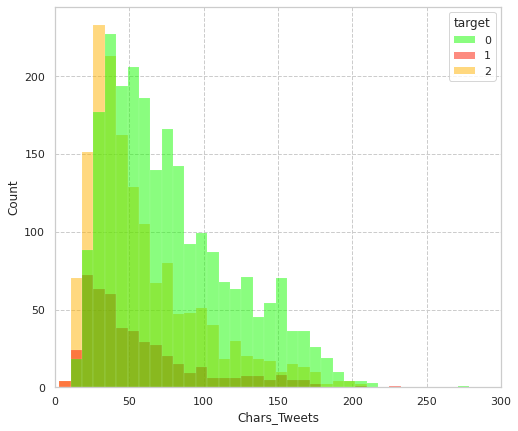

In [43]:
plt.figure(figsize=(8, 7))
mycolors = ["#17FC00", "#FC1800","#FFB200"]
ax = sns.histplot(data=df, x="Chars_Tweets",bins = 600, hue="target",palette=sns.color_palette(mycolors))
plt.grid()
ax.set_xlim(0,300)

In [41]:
sns.set_style("whitegrid", {'axes.grid' : False, 'grid.linestyle': '--'})

(0.0, 35.0)

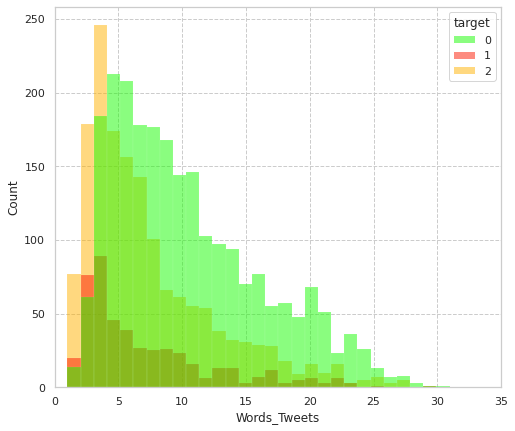

In [42]:
plt.figure(figsize=(8, 7))
mycolors = ["#17FC00", "#FC1800","#FFB200"]
ax = sns.histplot(data=df, x="Words_Tweets",bins = 600, hue="target",palette=sns.color_palette(mycolors))
plt.grid()
ax.set_xlim(0,35)